In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Loading dataset
data = pd.read_excel('Parkisons Dataset 1 Final (1).xlsx')

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Remove non-numeric columns
numeric_data = data.drop(non_numeric_columns, axis=1)

# Preprocess the numeric data (scaling or normalization might be needed)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# K-means clustering with k = 3
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(data_scaled)

# K-means clustering with k = 5
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(data_scaled)

# Check inertia or silhouette scores for evaluating the clustering
print("K=3 Inertia:", kmeans3.inertia_)
print("K=5 Inertia:", kmeans5.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=3 Inertia: 2222.2484249109357
K=5 Inertia: 1707.1726203145954


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

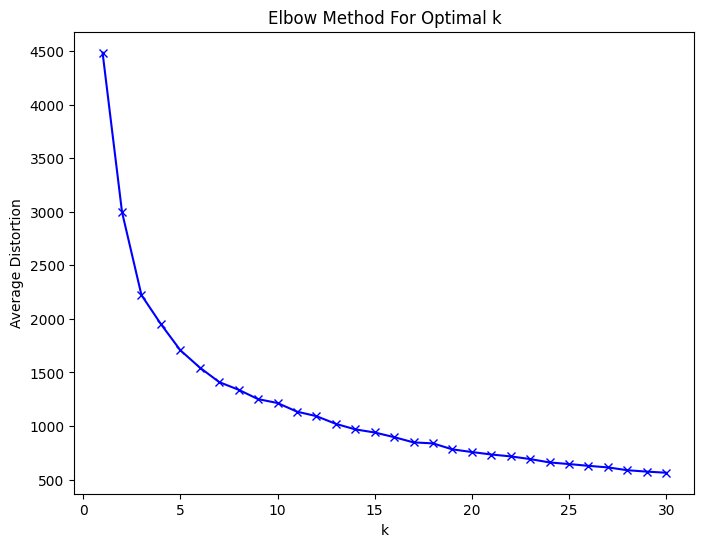

In [3]:
# Determine the ideal k value using the Elbow Method
distortions = []
K = range(1, 31)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

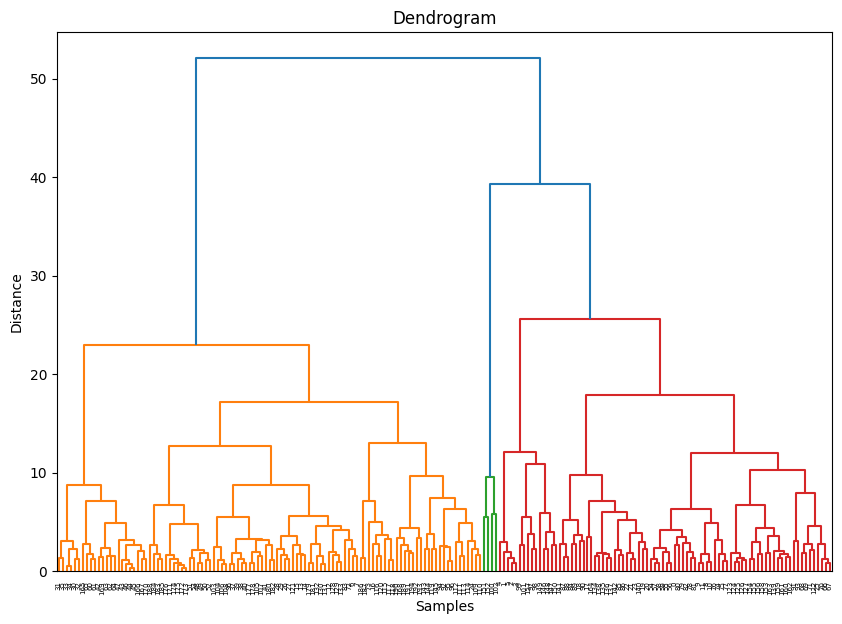

In [4]:
# Hierarchical clustering using Agglomerative Clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [5]:
# Separate features and target

X = data.drop(columns=['status'])  # Features
y = data['status']  # Target

# Select only numeric columns for feature selection
numeric_columns = X.select_dtypes(include=['number']).columns.tolist()
X_numeric = X[numeric_columns]

# Scale numeric data for feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Sequential Feature Selector
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=1)
selector.fit(X_scaled, y)

# Get selected features
selected_features = X_numeric.columns[selector.support_]


In [6]:
# Perform PCA on scaled data
pca = PCA(n_components=0.95)  # Captures 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Get the number of components/features needed for 95% variance
num_features_for_95_variance = pca.n_components_

# Print the number of components/features needed for 95% variance
print("Number of features needed for 95% variance in PCA:", num_features_for_95_variance)


Number of features needed for 95% variance in PCA: 8


In [7]:
# PCA with K components
K = 10  # Update with the desired number of components
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X_scaled)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Model (Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate accuracy using the transformed dataset
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using transformed dataset:", accuracy)

Accuracy using transformed dataset: 0.8974358974358975
